<a href="https://colab.research.google.com/github/umiSirya/Weather_Prediction_capstone_project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import the Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load and Prepare the Dataset**

In [3]:
df=pd.read_csv('/content/result.csv')
df.head()

,Y,X,uv_index_hourly_average,url,dataset,instance_datetime,platform_id,platform_name,country,gaw_id,instrument_name,instrument_model,instrument_number,uv_index_qa,instance_hour,platform_type,data_payload_id,latest_observation,uv_index_daily_max,agency
0,45.74,7.36,0.177875,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,9.0,STN,2884025,0,1.19455,ARPA-VDA
1,45.74,7.36,0.989250,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,11.0,STN,2884032,0,1.19455,ARPA-VDA
2,45.74,7.36,1.194550,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,13.0,STN,2884039,0,1.19455,ARPA-VDA
3,45.74,7.36,0.188125,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,16.0,STN,2884049,0,1.19455,ARPA-VDA
4,45.74,7.36,0.544150,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/30 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,15.0,STN,2880762,0,1.49725,ARPA-VDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21967 entries, 0 to 21966
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Y                        21967 non-null  float64
 1   X                        21967 non-null  float64
 2   uv_index_hourly_average  21967 non-null  float64
 3   url                      21967 non-null  object 
 4   dataset                  21967 non-null  object 
 5   instance_datetime        21967 non-null  object 
 6   platform_id              21967 non-null  int64  
 7   platform_name            21967 non-null  object 
 8   country                  21967 non-null  object 
 9   gaw_id                   21967 non-null  object 
 10  instrument_name          21967 non-null  object 
 11  instrument_model         21967 non-null  object 
 12  instrument_number        21967 non-null  int64  
 13  uv_index_qa              21967 non-null  object 
 14  instance_hour         

# **3. Data Cleaning**

In [5]:
# Convertdate column is in datetime format
df['instance_date'] = pd.to_datetime(df['instance_datetime'])

# Sort the DataFrame by date in ascending order
df = df.sort_values(by='instance_date', ascending=True).reset_index(drop=True)

# Choosing relevant columns
df = df[['instance_date', 'uv_index_daily_max']]

# Keep only the first row for each date
df = df.drop_duplicates(subset='instance_date', keep='first').reset_index(drop=True)


In [6]:
#checking for null values
df.isnull().sum()

,0
instance_date,0
uv_index_daily_max,0


In [7]:
print(df.head())

  instance_date  uv_index_daily_max
0    1999-12-31            0.304709
1    2000-01-01            0.316398
2    2000-01-02            0.329537
3    2000-01-03            0.388613
4    2000-01-04            0.384048


In [8]:
print(df.tail())

     instance_date  uv_index_daily_max
4111    2017-10-27             0.94430
4112    2017-10-28             1.54505
4113    2017-10-29             1.46823
4114    2017-10-30             1.49725
4115    2017-10-31             1.19455


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instance_date       4116 non-null   datetime64[ns]
 1   uv_index_daily_max  4116 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.4 KB


In [10]:
df.describe()

,instance_date,uv_index_daily_max
count,4116,4116.000000
mean,2007-07-15 05:55:48.104956416,1.408614
min,1999-12-31 00:00:00,0.000843
25%,2002-11-25 18:00:00,0.432284
50%,2007-11-05 12:00:00,0.901200
75%,2010-11-17 06:00:00,1.805227
max,2017-10-31 00:00:00,7.240690
std,NaN,1.375778


<ipython-input-11-597bd890e5d9>:23: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


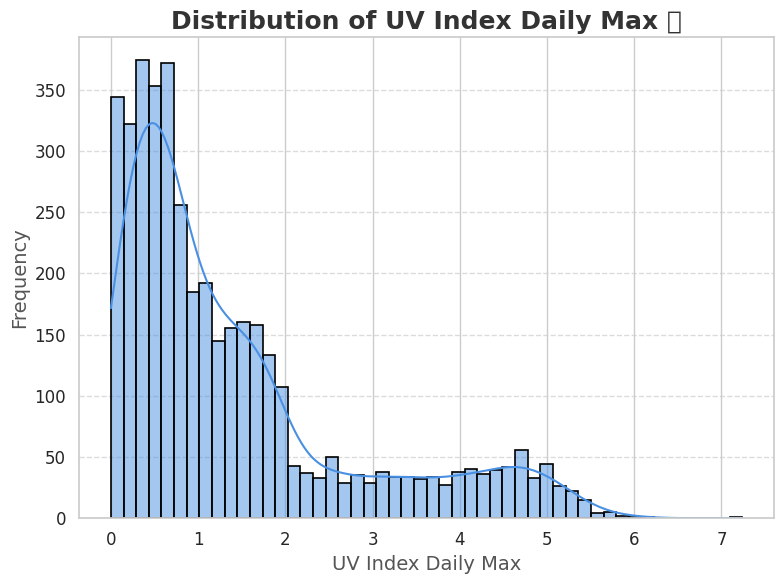

In [11]:
#Frequency Distribution of UV Index daily max

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x='uv_index_daily_max',
    bins=50,
    kde=True,
    color="#4A90E2",
    edgecolor="black",
    linewidth=1.2
)


plt.title('Distribution of UV Index Daily Max 🌞', fontsize=18, fontweight='bold', color="#333333")
plt.xlabel('UV Index Daily Max', fontsize=14, color="#555555")
plt.ylabel('Frequency', fontsize=14, color="#555555")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# saving cleaned data into a csv file
df.to_csv('cleaned_uv_data.csv', index=False)
